In [1]:
# Import all needed libraries and sublibraries

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import keras

import numpy as np

from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers

import pandas as pd

import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import matplotlib
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
# load the data
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
#Drop the column with all missing values (na, NAN, NaN)
#NOTE: This drops the column Unnamed
df = df.dropna(axis=1)

In [6]:
#Get the new count of the number of rows and cols
df.shape

(569, 32)

In [7]:
#Get a count of the number of Malignant (M) (harmful) or Benign (B) cells (not harmful)
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

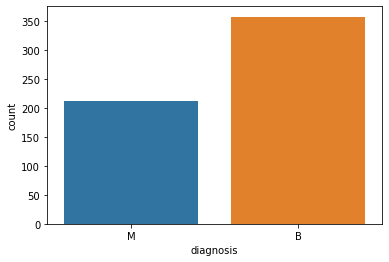

In [8]:
#Visualize this count
sns.countplot(df['diagnosis'],label="Count")

In [9]:
#Look at the data types to see which columns need to be transformed / encoded to a number
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
#Transform/ Encode the column diagnosis
#dictionary = {'M':1, 'B':0}#Create a dictionary file
#df.diagnosis = [dictionary[item] for item in df.diagnosis] #Change all 'M' to 1 and all 'B' to 0 in the diagnosis col

#Encoding categorical data values (Transforming categorical data/ Strings to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1]= labelencoder_Y.fit_transform(df.iloc[:,1].values)
print(labelencoder_Y.fit_transform(df.iloc[:,1].values))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [11]:
#Get the correlation of the columns
df.corr()
#df.iloc[:,1:12].corr() #Get a sample of correlated column info


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [ ]:
#A “pairs plot” is also known as a scatterplot, in which one variable in the same data row is matched with another variable's value
sns.pairplot(df, hue="diagnosis")
#sns.pairplot(df.iloc[:,1:6], hue="diagnosis") #plot a sample of the columns

/Users/babita/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/babita/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [ ]:
#Visualize the correlation 
#NOTE: To see the numbers within the cell ==>  sns.heatmap(df.corr(), annot=True)
plt.figure(figsize=(20,20))  #This is used to change the size of the figure/ heatmap
sns.heatmap(df.corr(), annot=True, fmt='.0%')
#plt.figure(figsize=(10,10)) #This is used to change the size of the figure/ heatmap
#sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%') #Get a heap map of 11 columns, index 1-11, note index 0 is just the id column and is left out

In [12]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 2:31].values #Notice I started from index  2 to 31, essentially removing the id column & diagnosis
Y = df.iloc[:, 1].values #Get the target variable 'diagnosis' located at index=1

In [13]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)


In [14]:
# Scale the data to bring all features to the same level of magnitude
# This means the data will be within a specific range for example 0 -100 or 0 - 1

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [16]:
model = models(X_train, Y_train)

/Users/babita/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0]Logistic Regression Training Accuracy: 0.989010989010989
[1]K Nearest Neighbor Training Accuracy: 0.9802197802197802
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9868131868131869
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9846153846153847
[4]Gaussian Naive Bayes Training Accuracy: 0.9494505494505494
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9978021978021978


In [17]:
#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))

[[65  2]
 [ 3 44]]
Model[0] Testing Accuracy = "0.956140350877193!"
[[67  0]
 [ 5 42]]
Model[1] Testing Accuracy = "0.956140350877193!"
[[64  3]
 [ 1 46]]
Model[2] Testing Accuracy = "0.9649122807017544!"
[[67  0]
 [ 2 45]]
Model[3] Testing Accuracy = "0.9824561403508771!"
[[62  5]
 [ 5 42]]
Model[4] Testing Accuracy = "0.9122807017543859!"
[[62  5]
 [ 3 44]]
Model[5] Testing Accuracy = "0.9298245614035088!"
[[66  1]
 [ 2 45]]
Model[6] Testing Accuracy = "0.9736842105263158!"


In [18]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()#Print a new line

Model  0
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193

Model  1
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193

Model  2
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.94      0.98      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted 

In [19]:
#Print Prediction of Random Forest Classifier model
pred = model[6].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


In [27]:
# Define a "shallow" logistic regression model

model = Sequential()

model.add(Dense(13,input_shape=(29,), activation='sigmoid',
               activity_regularizer =regularizers.l1(1e-4)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [28]:
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history

history = model.fit(X_train, Y_train, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])

history_dict=history.history

Epoch 00374: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

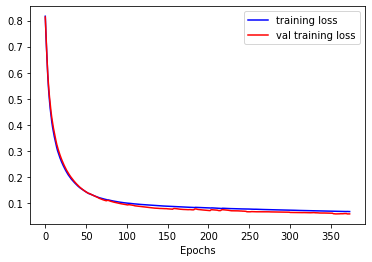

In [29]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

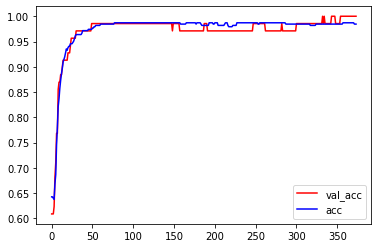

In [30]:
# Plot accuracy over the epochs

accuracy_values = history_dict['acc']
val_accuracy_values=history_dict['val_acc']
plt.plot(val_accuracy_values,'-r',label='val_acc')
plt.plot(accuracy_values,'-b',label='acc')
plt.legend()

In [32]:
# Calculate loss and accuracy of testing data
loss, acc = model.evaluate(X_test, Y_test)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 209us/step
Test loss:  0.14572821845088088
Test accuracy:  0.9385964922737657


In [34]:
# AUC score of testing data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
Y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test,Y_test_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9815814544299778


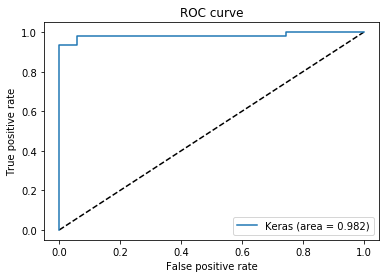

In [35]:
# ROC curve of testing data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [36]:
# AUC score of training data
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
Y_train_pred = model.predict_proba(X_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_train,Y_train_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Training data AUC: ', auc_keras)

Training data AUC:  0.9984117032392895


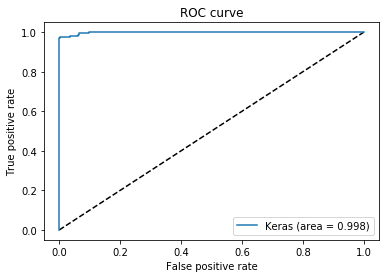

In [37]:
# ROC curve of training data
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [44]:
# Make y_train categorical and assign this to y_train_cat
Y_train_cat = to_categorical(Y_train)

In [48]:
#Define a "shallow" softmax regression model

model = Sequential()
model.add(Dense(13,input_shape=(29,), activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics = ['accuracy'])

In [49]:
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=40, verbose=1, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history
history = model.fit(X_train, Y_train_cat, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])

history_dict=history.history

Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

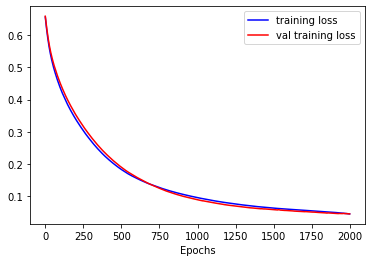

In [50]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

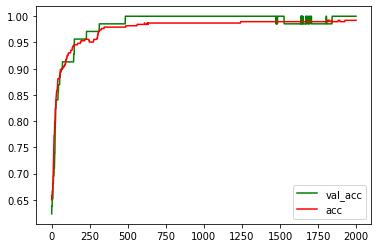

In [51]:
# Plot accuracy over the epochs

accuracy_values = history_dict['acc']
val_accuracy_values=history_dict['val_acc']
plt.plot(val_accuracy_values,'-g',label='val_acc')
plt.plot(accuracy_values,'-r',label='acc')
plt.legend()

In [54]:
# Calculate loss and accuracy of testing data
Y_test_cat = to_categorical(Y_test)
loss, acc = model.evaluate(X_test, Y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 217us/step
Test loss:  0.08655559912062528
Test accuracy:  0.956140346694411


In [56]:
# AUC score of testing data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
Y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, Y_test_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9958717053032708


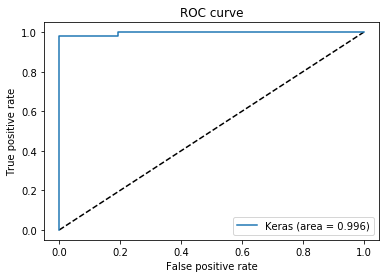

In [57]:
# ROC curve of testing data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [59]:
# AUC score of training data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
Y_train_pred = model.predict_proba(X_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_train, Y_train_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9984117032392894


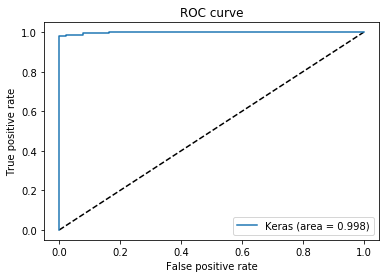

In [60]:
# ROC curve of training data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [64]:
# Define a "deep" softmax regression model
model = Sequential()

model.add(Dense(13,input_shape=(29,), activation='softmax',
               activity_regularizer =regularizers.l1(1e-4)))
model.add(Dense(13, activation='softmax',
               activity_regularizer =regularizers.l1(1e-4)))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [65]:
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=40, verbose=1, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history
history = model.fit(X_train, Y_train_cat, epochs = 3000, validation_split = 0.1,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])
history_dict = history.history

Epoch 00458: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

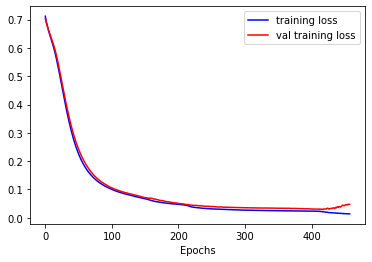

In [66]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

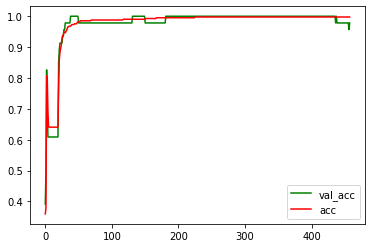

In [67]:
# Plot accuracy over the epochs

accuracy_values = history_dict['acc']
val_accuracy_values=history_dict['val_acc']
plt.plot(val_accuracy_values,'-g',label='val_acc')
plt.plot(accuracy_values,'-r',label='acc')
plt.legend()

In [70]:
# Calculate loss and accuracy of testing data
Y_test_cat = to_categorical(Y_test)
loss, acc = model.evaluate(X_test, Y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 224us/step
Test loss:  0.14667101988666936
Test accuracy:  0.9561403519228885


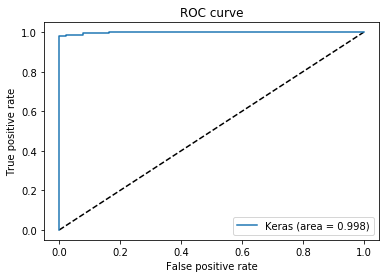

In [71]:
# ROC curve of testing data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [73]:
#  AUC score of training data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
Y_train_pred = model.predict_proba(X_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_train, Y_train_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9999582027168233


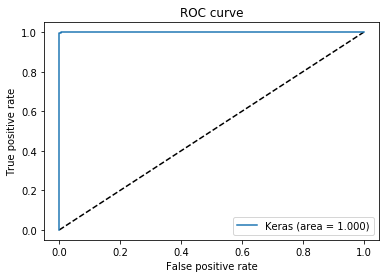

In [74]:
# ROC curve of training data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [75]:
# using Suport Vector machines, Using all mean values features

from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time

features_selection = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

X = df.loc[:,features_selection]
y = df.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_selection = []
cvs_selection = []

model = SVC()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
scores = cross_val_score(model, X,Y, cv =5)

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))


print("Svc Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%}".format(np.mean(scores), np.std(scores)*2))
#print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))


model = LinearSVC()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
scores = cross_val_score(model, X, y, cv=5)


accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

/Users/babita/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/babita/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/babita/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/babita/opt/anaconda3/lib/python3.

Svc Classifier Accuracy: 74.56%
Cross validation score: 78.20%
LinearSVC Accuracy: 75.44%
Cross validation score: 83.48% (+/- 3.41%)


/Users/babita/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/babita/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/babita/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/babita/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/babita/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, i

In [ ]:
# to show the ROC Curves using SVM

In [76]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

#lets start by fitting two models, one more flexible than the #other:

#More constrained model

svm3 = SVC(C=1, kernel ='rbf', gamma=50)
svm3.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
#More flexible model
svm4 = SVC(C=1, kernel = 'rbf', gamma =50)
svm4.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [79]:
y_train_score3 =svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

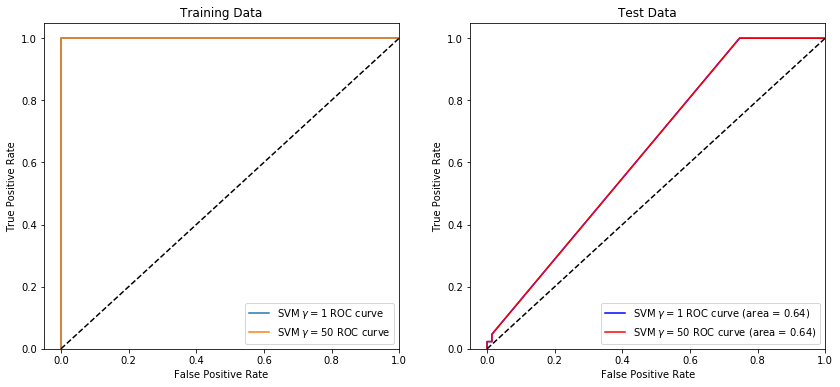

In [80]:
false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _=roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label = 'SVM $\gamma = 1$ ROC curve')
ax1.plot(false_pos_rate4, true_pos_rate4, label ='SVM $\gamma = 50$ ROC curve')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)
false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)
false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")